In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Part 3

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [34]:
df = pd.read_csv("car_data.csv")


array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

## Tasks Part 1

In [14]:
df_prices = df[['Price']]
df_mileages = df['Mileage']

df_prices.sort().head()

,Price
0,17314.103129
1,17542.036083
2,16218.847862
3,16336.913140
4,16339.170324


In [132]:
df_mileages.head()

0     8221
1     9135
2    13196
3    16342
4    19832
Name: Mileage, dtype: int64

In [8]:
regr1 = linear_model.LinearRegression()
regr1.fit(df_prices, df_mileages)
score1 = regr1.score(df_prices, df_mileages)
score1

0.020463447323489037

In [11]:
coef, intercept = regr1.coef_, regr1.intercept_
price_reg = 'price_reg = {}X + {}'.format(coef, intercept)
price_reg

'price_reg = [-0.11861458]X + 22363.54215594064'

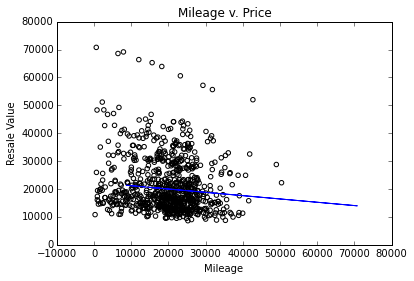

In [97]:
plt.plot(df_prices, regr1.predict(df_prices), color = 'b')
plt.scatter(df_mileages, df_prices, marker='o', facecolor = 'none')
plt.xlabel('Mileage')
plt.ylabel('Resale Value')
plt.title('Mileage v. Price')
plt.show()

## Tasks Part 2

In [135]:
from itertools import combinations

In [136]:
#helper function
def plot_regression(cols):
    input_values = prices[list(cols)]
    output_values = prices.Prices
    r = linear_model.LinearRegression()
    r.fit(mileages,prices)
    

    print(cols)
    print(r.score(mileages,prices))
    print(r.coef_,r.intercept_)

In [137]:
combos = []
names = ["Price", "Mileage", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]
# names = ["Price", "Mileage", "Make", "Model", "Trim", "Type", "Cylinder", "Liter", "Doors", "Cruise", "Sound", "Leather"]
for x in range(len(names)):
    combos.append(list(combinations(names, x)))
    
inputs = []
output = df[['Price']]

for x in combos:
    for y in x:
        if len(y) == 0:
            continue
        inputs.append(list(y))
        
results = []

for x in inputs:
    input_data = df[x]
    regr4 = linear_model.LinearRegression()
    regr4.fit(input_data, output)
    results.append([', '.join(x), regr4.score(input_data, output)])
    
results = pd.DataFrame(results, columns= ('Grouping', 'Score'))

sorted_results = results.sort_index(by='Score', ascending=[False])

In [138]:
df = pd.read_csv("car_data.csv")
multiple_regression = linear_model.LinearRegression()
combos = df[['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound','Leather']]
price = df['Price']
multiple_regression.fit(combos, price)
print('Coefficients:\n',multiple_regression.coef_, '\nIntercept:\n', multiple_regression.intercept_)
print('R^2 Score:\n', multiple_regression.score(combos, price))


Coefficients:
 [ -1.69747832e-01   3.79237893e+03  -7.87220732e+02  -1.54274585e+03
   6.28899715e+03  -1.99379528e+03   3.34936162e+03] 
Intercept:
 6758.7551436
R^2 Score:
 0.446264353673


## Part 3 Brainstorming

In [133]:
df['Model'].unique()

array(['Century', 'Lacrosse', 'Lesabre', 'Park Avenue', 'CST-V', 'CTS',
       'Deville', 'STS-V6', 'STS-V8', 'XLR-V8', 'AVEO', 'Cavalier',
       'Classic', 'Cobalt', 'Corvette', 'Impala', 'Malibu', 'Monte Carlo',
       'Bonneville', 'G6', 'Grand Am', 'Grand Prix', 'GTO', 'Sunfire',
       'Vibe', '9_3', '9_3 HO', '9_5', '9_5 HO', '9-2X AWD', 'Ion',
       'L Series'], dtype=object)

In [134]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'], dtype=object)

In [121]:
multiple_regression

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
print(sorted_results.head(150))


                                              Grouping     Score
0                                                Price  1.000000
174              Price, Mileage, Liter, Doors, Leather  1.000000
93                     Price, Mileage, Cylinder, Doors  1.000000
92                     Price, Mileage, Cylinder, Liter  1.000000
163            Price, Mileage, Cylinder, Liter, Cruise  1.000000
164             Price, Mileage, Cylinder, Liter, Sound  1.000000
165           Price, Mileage, Cylinder, Liter, Leather  1.000000
166            Price, Mileage, Cylinder, Doors, Cruise  1.000000
167             Price, Mileage, Cylinder, Doors, Sound  1.000000
168           Price, Mileage, Cylinder, Doors, Leather  1.000000
169            Price, Mileage, Cylinder, Cruise, Sound  1.000000
170          Price, Mileage, Cylinder, Cruise, Leather  1.000000
171           Price, Mileage, Cylinder, Sound, Leather  1.000000
172               Price, Mileage, Liter, Doors, Cruise  1.000000
173                Price,

In [131]:
poss_cols = ['Mileage', 'Cylinder', 
            'Liter', 'Doors', 'Cruise', 
            'Sound', 'Leather']
for x in range(1, len(poss_cols)):
    input_data = df[poss_cols]
    output_data = df.Price
    regr = linear_model.LinearRegression()
    regr.fit(input_data, output_data)
    
for x in poss_cols:
    print("The R2 score for {} is: ".format(x), regr.score(input_data, output_data))

The R2 score for Mileage is:  0.446264353673
The R2 score for Cylinder is:  0.446264353673
The R2 score for Liter is:  0.446264353673
The R2 score for Doors is:  0.446264353673
The R2 score for Cruise is:  0.446264353673
The R2 score for Sound is:  0.446264353673
The R2 score for Leather is:  0.446264353673


In [128]:
output_data

0      17314.103129
1      17542.036083
2      16218.847862
3      16336.913140
4      16339.170324
5      15709.052821
6      15230.003390
7      15048.042184
8      14862.093870
9      15295.018267
10     21335.852485
11     20538.087510
12     20512.094091
13     19924.159052
14     19774.249066
15     19344.165537
16     19105.130124
17     18543.427045
18     17808.198996
19     17968.838278
20     22358.877678
21     23785.922526
22     22926.090371
23     21895.758784
24     21273.061714
25     21460.013953
26     21183.123587
27     20406.099503
28     21058.139580
29     19556.899320
           ...     
774    14568.002255
775    13122.905457
776    13494.288783
777    12036.216751
778    12162.140047
779    12333.603993
780    12099.014578
781    12119.089702
782    11679.923546
783    13216.912048
784    12412.521107
785    12284.288290
786    12594.183013
787    12105.981336
788    11873.533995
789    12965.223269
790    10563.066162
791    11413.530403
792    11504.824550
